In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('data/crowley-1996.csv')
print(df)

     id condition  m1  m2  m3  m4  m5  m6
0   101  resident   3   3   3   3   3   3
1   102  resident   3   3   3   3   3   3
2   103  resident   3   3   3   3   2   2
3   104  resident   3   3   3   3   2   1
4   105  resident   3   3   3   2   2   1
..  ...       ...  ..  ..  ..  ..  ..  ..
59  228   control   2   1   1   1   1   1
60  229   control   1   1   1   1   1   1
61  230   control   1   1   1   1   1   1
62  231   control   1   1   1   1   1   1
63  232   control   1   1   1   1   1   1

[64 rows x 8 columns]


In [14]:
df['m1']

0     3
1     3
2     3
3     3
4     3
     ..
59    2
60    1
61    1
62    1
63    1
Name: m1, Length: 64, dtype: int64

## Experimental design

Independant variables / factors:
* month {1, 2, ... ,6}
* dog status {'resident', 'control'} (control means the dog is only visiting)
Dependant variable (i.e. what is measured):
* mood {1, 2, 3}

## Analysis

### Reproduction figure 2

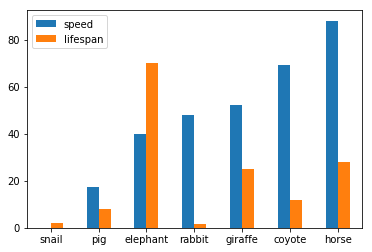

In [15]:
# From pandas documentation
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df_demo = pd.DataFrame({'speed': speed,
                        'lifespan': lifespan}, index=index)
ax = df_demo.plot.bar(rot=0)

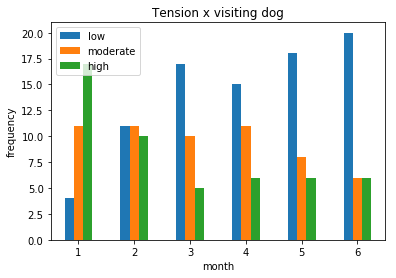

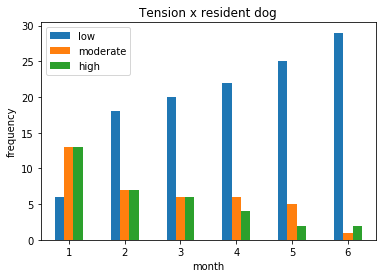

In [16]:
# Number of people 'low' for the month 1, month 2, etc. for visiting

dog_status = ['control', 'resident']

moods = {'low': 1, 'moderate': 2, 'high': 3}
n_months = 6

index = list(range(1, n_months+1))

#low = [] 
#moderate = []
#high = []

for ds in dog_status:

    data = {}
    for mood_label in moods.keys():
        data[mood_label] = []

    is_ds = df['condition'] == ds
    
    # sum_m1 = sum(df[is_low&is_control]['m1'])
    # sum_m2 = sum(df[is_low&is_control]['m2'])
    # low.append(sum_m1)
    # low.append(sum_m2)

    for i in range(n_months):
        key_month = 'm' + str(i+1)

        # is_low = df[key_month] == 1
        # sum_low = sum(df[is_low&is_control][key_month])
        # low.append(sum_low)

        for (mood_label, mood_value) in moods.items():

            is_mood = df[key_month] == mood_value
            count_mood = len(df[is_mood & is_ds][key_month])

            data[mood_label].append(count_mood)

            #if mood == 1:
            #    low.append(sum_actual_mood)
            #elif mood == 2:
            #    moderate.append(sum_actual_mood)
            #else:
            #    high.append

    if ds == 'resident':
        condition_label = ds
    else:
        condition_label = 'visiting'
    
    title = f'Tension x {condition_label} dog'
    
    df_fig = pd.DataFrame(data, index=index)
    ax = df_fig.plot.bar(rot=0)
    ax.set_xlabel('month')
    ax.set_ylabel('frequency')
    ax.set_title(title)
    plt.show()

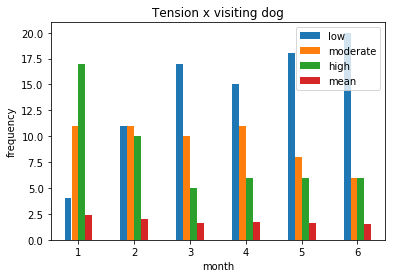

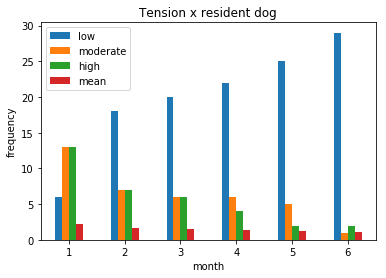

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

DATA_FOLDER = 'data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

data_file = os.path.join(DATA_FOLDER, 'crowley-1996.csv')
df = pd.read_csv(data_file)

# Number of people 'low' for the month 1, month 2, etc. for visiting

dog_status = ['control', 'resident']

moods = {'low': 1, 'moderate': 2, 'high': 3}
n_months = 6

index = list(range(1, n_months + 1))

# low = []
# moderate = []
# high = []

for ds in dog_status:

    data = {}
    labels = ['low', 'moderate', 'high', 'mean']
    for label in labels:
        data[label] = []

    # data = {'low': [], 'moderate': [], 'high': [], 'mean':[]}

    is_ds = df['condition'] == ds

    # sum_m1 = sum(df[is_low&is_control]['m1'])
    # sum_m2 = sum(df[is_low&is_control]['m2'])
    # low.append(sum_m1)
    # low.append(sum_m2)

    for i in range(n_months):
        key_month = 'm' + str(i + 1)

        # is_low = df[key_month] == 1
        # sum_low = sum(df[is_low&is_control][key_month])
        # low.append(sum_low)

        for (mood_label, mood_value) in moods.items():

            is_mood = df[key_month] == mood_value
            count_mood = len(df[is_mood & is_ds][key_month])

            data[mood_label].append(count_mood)

        mean_mood = np.mean(df[is_ds][key_month])

        data['mean'].append(mean_mood)

    if ds == 'resident':
        condition_label = ds
    else:
        condition_label = 'visiting'

    title = f'Tension x {condition_label} dog'

    df_fig = pd.DataFrame(data, index=index)
    ax = df_fig.plot.bar(rot=0)
    ax.set_xlabel('month')
    ax.set_ylabel('frequency')
    ax.set_title(title)

    fig_name = f'{condition_label}.pdf'
    fig_file = os.path.join(FIG_FOLDER, fig_name)
    plt.savefig(fig_file)


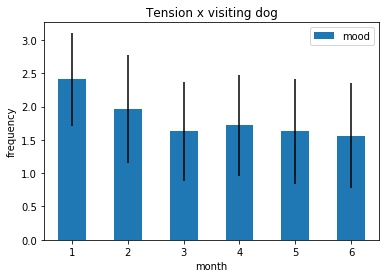

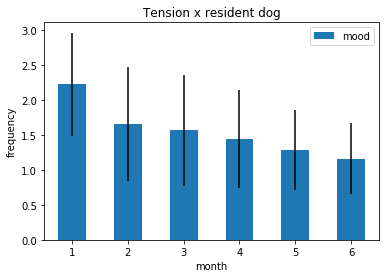

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

DATA_FOLDER = 'data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

data_file = os.path.join(DATA_FOLDER, 'crowley-1996.csv')
df = pd.read_csv(data_file)

# Number of people 'low' for the month 1, month 2, etc. for visiting

dog_status = ['control', 'resident']

moods = {'low': 1, 'moderate': 2, 'high': 3}
n_months = 6

index = list(range(1, n_months + 1))

# low = []
# moderate = []
# high = []

for ds in dog_status:
    
    yerr=[]

    data = {}
    labels = ['mood']#['low', 'moderate', 'high', 'mean']
    for label in labels:
        data[label] = []

    # data = {'low': [], 'moderate': [], 'high': [], 'mean':[]}

    is_ds = df['condition'] == ds

    for i in range(n_months):
        key_month = 'm' + str(i + 1)

       # for (mood_label, mood_value) in moods.items():

       #     is_mood = df[key_month] == mood_value
       #     count_mood = len(df[is_mood & is_ds][key_month])

       #     data[mood_label].append(count_mood)
        x = df[is_ds][key_month]
        
        mean_mood = np.mean(x)
        std_mood = np.std(x)
        
        yerr.append(std_mood)
                  
        # np.mean(df[is_ds][key_month])  

        data['mood'].append(mean_mood)

    if ds == 'resident':
        condition_label = ds
    else:
        condition_label = 'visiting'

    title = f'Tension x {condition_label} dog'

    df_fig = pd.DataFrame(data, index=index)
    ax = df_fig.plot.bar(rot=0, yerr=yerr)
    ax.set_xlabel('month')
    ax.set_ylabel('frequency')
    ax.set_title(title)

    fig_name = f'{condition_label}.pdf'
    fig_file = os.path.join(FIG_FOLDER, fig_name)
    plt.savefig(fig_file)


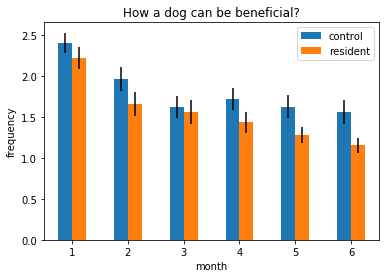

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats

DATA_FOLDER = 'data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

data_file = os.path.join(DATA_FOLDER, 'crowley-1996.csv')
df = pd.read_csv(data_file)

dog_status = ['control', 'resident']
n_months = 6

index = list(range(1, n_months + 1))

data = {}
yerr = {}

for label in dog_status:
    data[label] = []
    yerr[label] = []

for ds in dog_status:
    
    is_ds = df['condition'] == ds

    for i in range(n_months):
        key_month = 'm' + str(i + 1)

        x = df[is_ds][key_month]

        mean_mood = np.mean(x)
        std_mood =  scipy.stats.sem(x) #np.std(x)

        yerr[ds].append(std_mood)
        data[ds].append(mean_mood)

title = f'How a dog can be beneficial?'

df_fig = pd.DataFrame(data, index=index)
ax = df_fig.plot.bar(rot=0, yerr=yerr)
ax.set_xlabel('month')
ax.set_ylabel('frequency')
ax.set_title(title)

fig_name = f'{condition_label}.pdf'
fig_file = os.path.join(FIG_FOLDER, fig_name)
plt.savefig(fig_file)
